# Exploratory Data Analysis
## And logistics regression

In this study, we will be working with the Titanic Dataset from Kaggle. This is a very famous dataset.

We will try to predict a classification (survival or deceased). 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The column 'SibSp' represents the size of family or total count of spouse and siblings.
The valriable 'Parch' shows the total number of parents and children.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(data.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [7]:
print(data.describe(include='object'))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [8]:
data[['Sex', 'Embarked']].value_counts()

Sex     Embarked
male    S           441
female  S           203
male    C            95
female  C            73
male    Q            41
female  Q            36
Name: count, dtype: int64

In [9]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Missing data

In [11]:
print(data.isna().any().any())  # Returns True if there are any missing values


True


In [12]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# equivalent to data.isnull()
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum() # Returns the number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.isna().sum() # Returns the number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
print(data.isna().sum() / len(data) * 100) # Returns the percentage of missing values in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


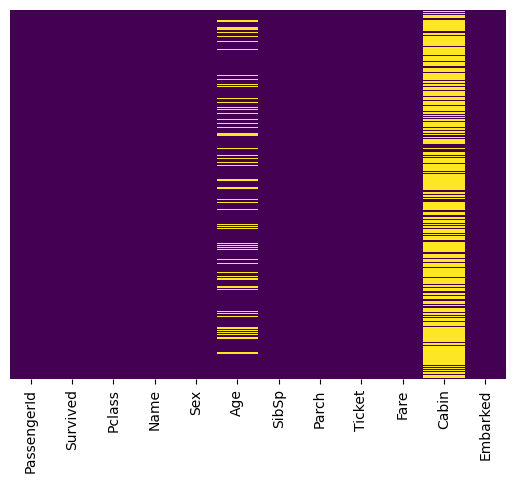

In [17]:
# Visualizing the missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Roughly 20% of Afe feature is missing. We can impute them in a way. 

Cabin feature has so many missing values that is probably not help ful for us. We will analyse it further later. But we might drop this column, or use a binary variable instead as knowing Cabing or not represented by {1,0}.

In some cases, the missing data might be informative or intentional, as an example take the debt ration of companies. There might be a reason for having missing in this variable. In such cases, we need more sophisticated methods to understand if the missing values are random or not and then deal with them.

<Axes: xlabel='Survived', ylabel='count'>

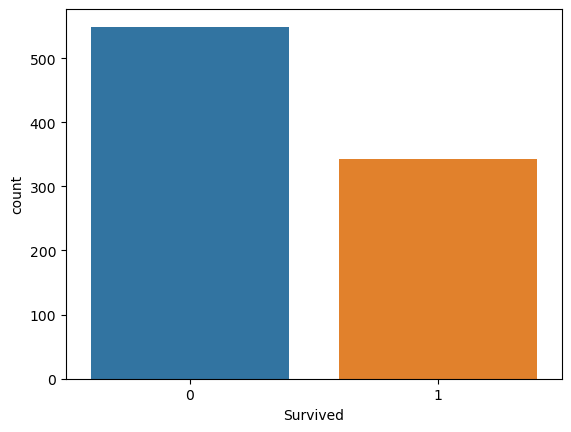

In [18]:
# visualizing survival rate
# sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

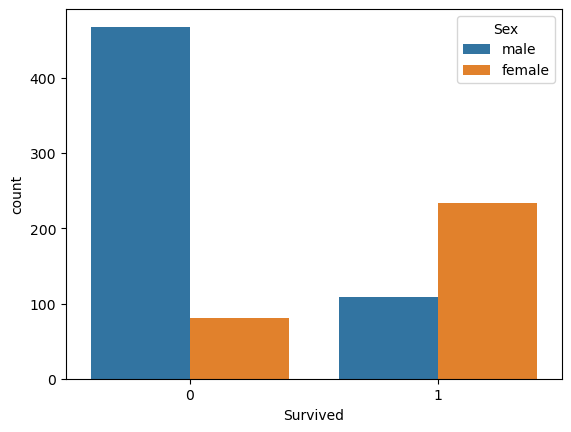

In [19]:
sns.countplot(x='Survived',hue='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

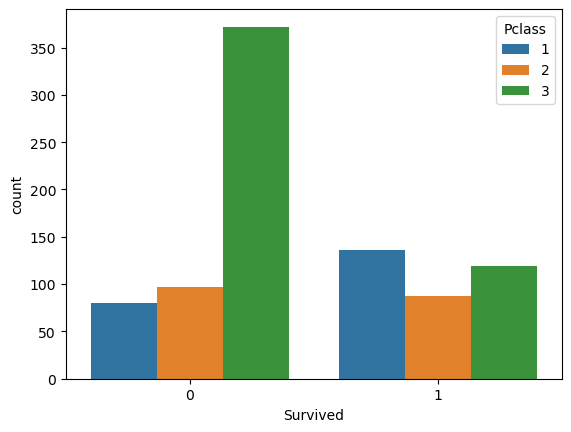

In [20]:
sns.countplot(x='Survived',hue='Pclass', data=data)

/Users/kavehnamvar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


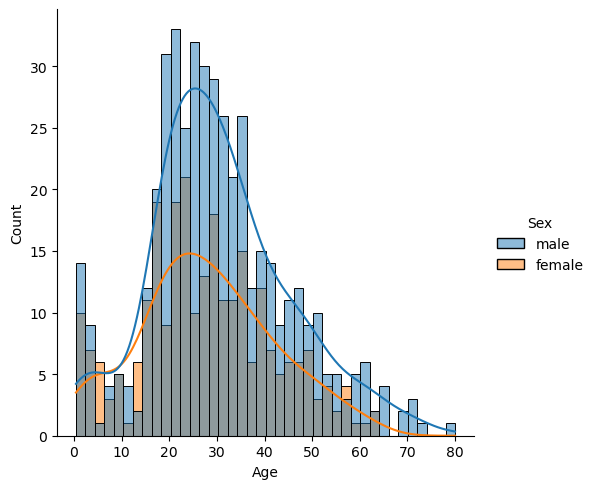

In [21]:
# let's see the distribution of age by sex
sns.displot(data=data,x='Age', kde=True, bins=40,hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

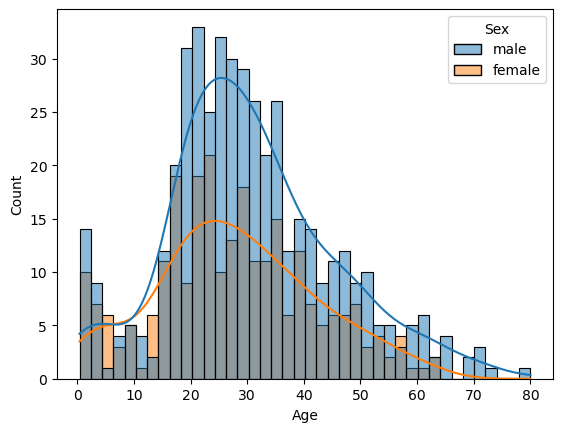

In [22]:
# similarly we can use histplot
sns.histplot(data=data,x='Age', kde=True, bins=40,hue='Sex')

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <BarContainer object of 40 artists>)

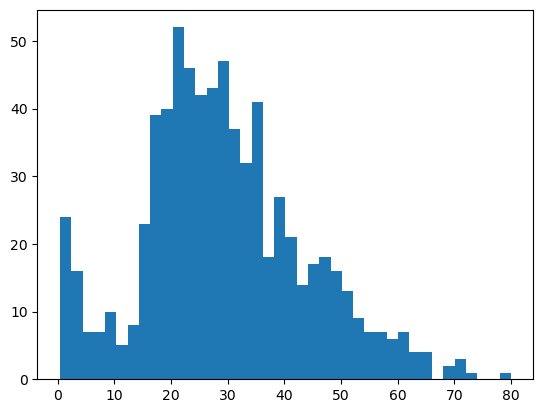

In [23]:
# Distribution of Age with matplotlib
plt.hist(data['Age'], bins=40)

<Axes: >

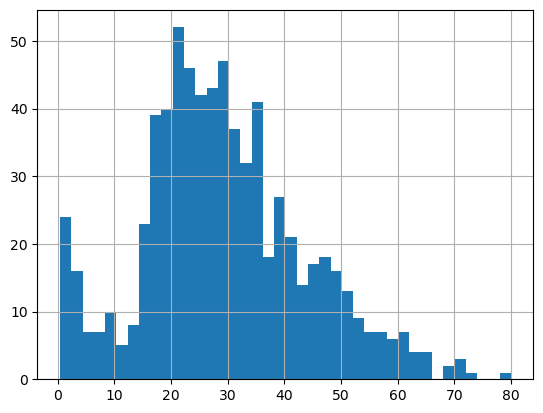

In [24]:
# similarly
data['Age'].hist(bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

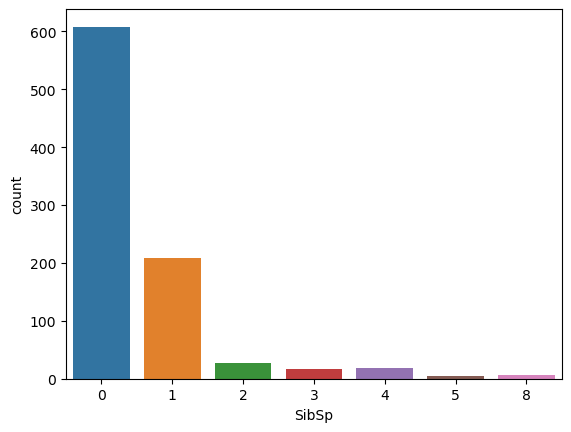

In [25]:
sns.countplot(x='SibSp', data=data)
# most of people had no siblings or spouse

<Axes: >

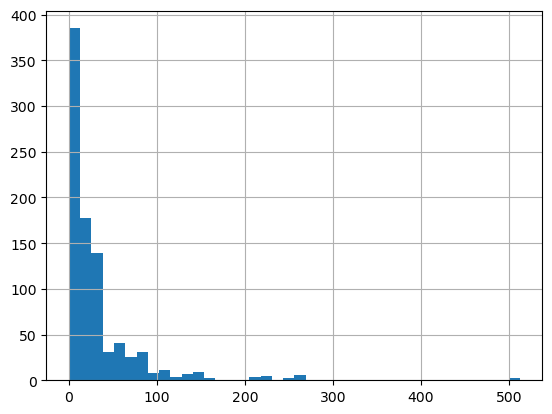

In [26]:
# how much people paid for the ticket from matplotlib
data['Fare'].hist(bins=40)

/Users/kavehnamvar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


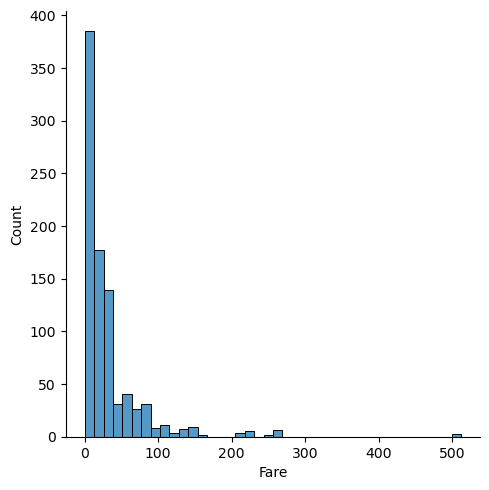

In [27]:
sns.displot(data=data,x='Fare', kde=False, bins=40)

## Data cleaning

For age, we can impute the missing values by average age, or average age per class is even much better because of the relationship there.

<Axes: >

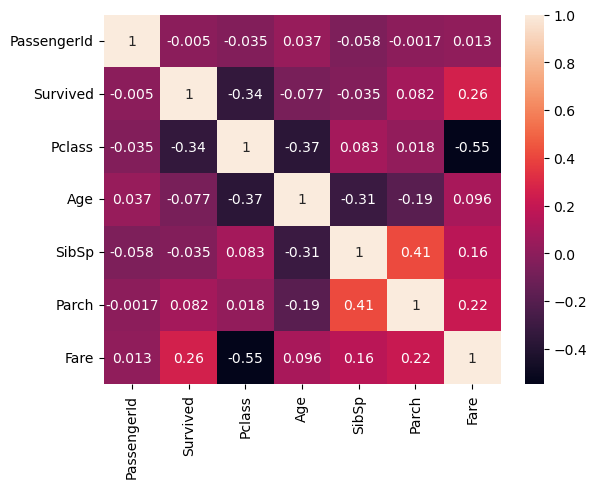

In [28]:
sns.heatmap(data.corr(numeric_only = True), annot=True)

<Axes: xlabel='Pclass', ylabel='Age'>

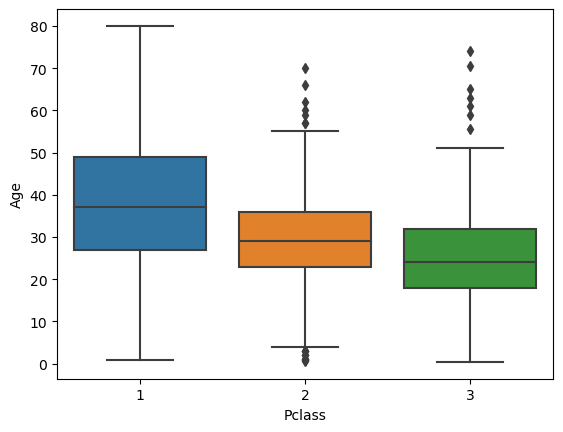

In [29]:
sns.boxplot(x='Pclass', y='Age', data=data)

In [30]:
data.pivot_table(values='Age', index='Pclass', aggfunc='median')

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [31]:
# using the pivot table to fill the missing values
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
# calling the function
data['Age'] = data[['Age', 'Pclass']].apply(fill_age, axis=1) # axis=1 means apply the function to each row

<Axes: >

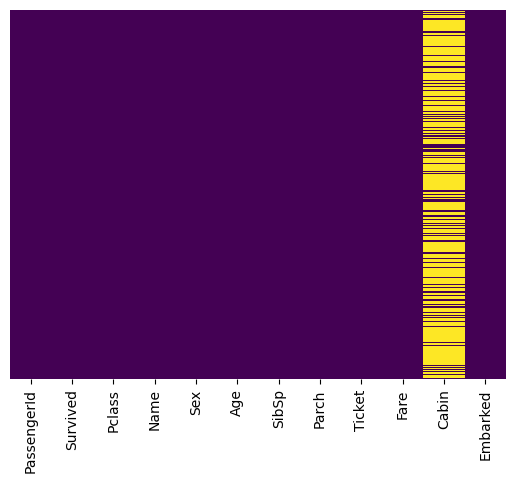

In [33]:
# checking the missing values in age in a heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
# checking by using isna() function
print(data['Age'].isna().sum())

0


In [35]:
# dropping the cabin column
data.drop('Cabin', axis=1, inplace=True)
# you can run the above code only once, if you run it again it will give an error because the column is already dropped
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [37]:
data.info()
# you see initially we had 12 columns, now we have 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [38]:
# you remember we had missing values in the embarked column for only 2 rows
# we drop these 2 rows
data.dropna(inplace=True)
# for our task we don't need the passenger id and name columns and Ticket column
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# the above line of code can be run only once, if you run it again it will give an error because the columns are already dropped
# columns sex and embarked are categorical, we need to convert them to numerical
# Sex has 2 categories and Embarked has 3 categories

In [39]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
# using get_dummies function to convert the Embaked to numerical
pd.get_dummies(data['Embarked'], drop_first=True).astype(int).head()
# drop_first=True means we drop the first column
# we don't need the first column because if the other 2 columns are 0, 
# then the first column will be 1 which means it is C

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
# using get_dummies function for sex column
pd.get_dummies(data['Sex'], drop_first=True).astype(int).head()

,male
0,1
1,0
2,0
3,0
4,1


In [43]:
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

So 0 is female and 1 is male

In [44]:
sex = pd.get_dummies(data['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(data['Embarked'], drop_first=True).astype(int)
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [45]:
data = pd.concat([data,sex,embark], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

This is the data we can use for our modeling.

## Modeling the classification using logistics regression

In [47]:
# splitting the data into features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [48]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
# checking if there are any missing values in X and y
print(X.isna().any().any())
print(y.isna().any().any())

False
False


In [51]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
# checking the shape of the training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


In [53]:
# training the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/kavehnamvar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[147,  16],
       [ 30,  74]])

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8277153558052435

Not bad results for a simple logistic regression.
Finding the best model and fine tuning would be another task. 

You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
Maybe the Cabin letter could be a feature
Is there any info you can get from the ticket?